Module import

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

Solve the following initial value differential equation $$ y'=\lambda y,  \quad  y(0)=y_0$$

Fuction Define

In [2]:
# analysis 함수 
def anal(x, lamb):
    return np.exp(lamb*x)

# n : w 개수, w : weight
def y(x, w, n = 4):
    y = 1         # y = 1 + w1*(x) + w2*(x**2) + w3*(x**3) + w4*(x**4)
    for i in range(1, n+1):
        y += w[i-1]*(x**i)
    
    return y

def yprime(x, w, n = 4):
    yprime = 0    # yprime = w1 + 2*w2*x + 3*w3*(x**2) + 4*w4*(x**3)
    for i in range(1, n + 1):
        yprime += i*w[i-1]*(x**(i-1))

    return yprime

def f(y, lamb):
    return lamb*y

In [3]:
# analysis 함수 
def anal(x, lamb):
    return np.exp(lamb*x)

# n : w 개수, w : weight
def y(x, w, n = 4):
    y = 1         # y = 1 + w1*(x) + w2*(x**2) + w3*(x**3) + w4*(x**4)
    for i in range(1, n+1):
        y += w[i-1]*(x**i)
    
    return y

def yprime(x, w, n = 4):
    yprime = 0    # yprime = w1 + 2*w2*x + 3*w3*(x**2) + 4*w4*(x**3)
    for i in range(1, n + 1):
        yprime += i*w[i-1]*(x**(i-1))

    return yprime

def f(y, lamb):
    return lamb*y

Parameter

In [4]:
# 최대 x 범위 : 0 <= x < x_max, lambda 값
x_max = 1
x = tf.Variable(np.array([[i/100] for i in range(0, x_max * 100, 1)], dtype = np.float32))
lamb = 1

# 차수, weight 개수
n = 4
w = tf.Variable(tf.random.normal(shape=(n,), dtype=tf.float32), trainable=True) # w = [weight1, weight2, weight3, weight4]

# 변화 w 값, loss 저장
w_trace = []
w_trace.append(w.numpy())
loss_trace = []

#  학습률 조정
learning_rate = 0.01
# EPOCH = 100

# 원하는 loss 값에 도달할 때 까지 Epoch 횟수 올리기
Epoch = 0
target_loss = 0.0000001

Train

In [5]:
# y' = f(y, t)를 만족하는 y 찾는 과정
optimizer = keras.optimizers.SGD(learning_rate=1e-3)
from collections import deque


# 학습 과정
while True:
    Epoch += 1
    dq = deque([1,2,3], 3)
    for x_unit in x:
        with tf.GradientTape() as tape:
            # 예측 값
            predict = f(y(x_unit, w, n), lamb)
            # y' = f(y, t)
            loss = tf.math.sqrt(tf.square(predict - yprime(x_unit, w, n)))
            loss_trace.append(loss.numpy())
            dq.append(float(loss))
            # # 오차
            w_trace.append(w.numpy())
            # w = tf.Variable(w - learning_rate*gradients)
        dif = float(loss) < target_loss
        if dif:
            break
        gradients = tape.gradient(loss, w)
        optimizer.apply_gradients(zip([gradients], [w]))
    if dif and round(dq[0], 15) >= round(dq[2], 15):
            break
    if Epoch % 1000 == 0:
        # print('Epoch : {}, Loss : {:.4f}'.format(Epoch, loss))
        print(Epoch, loss)
print(Epoch, loss)

630 tf.Tensor([0.], shape=(1,), dtype=float32)


weight 값 출력

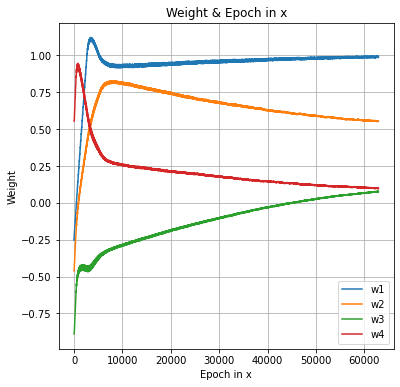

In [6]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_title('Weight & Epoch in x')
ax.set_xlabel('Epoch in x')
ax.set_ylabel('Weight')
ax.plot(w_trace, label = ['w1', 'w2', 'w3', 'w4'])
ax.tick_params(labelsize=10)
ax.legend(fontsize=10)
ax.grid()

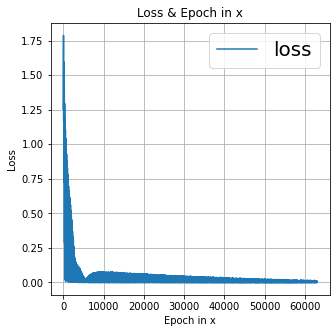

In [7]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.set_title('Loss & Epoch in x')
ax.set_xlabel('Epoch in x')
ax.set_ylabel('Loss')
ax.plot(loss_trace, label = 'loss')
ax.tick_params(labelsize=10)
ax.legend(fontsize=20)
ax.grid()

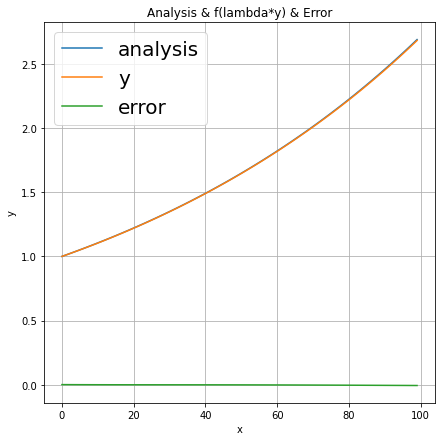

In [8]:
fig, ax = plt.subplots(figsize=(7, 7))
ax.set_title('Analysis & f(lambda*y) & Error')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.plot(anal(x,lamb), label = 'analysis')
ax.plot(y(x, w, n), label = 'y')
ax.plot(y(x, w, n) - anal(x,lamb), label = 'error')
ax.tick_params(labelsize=10)
ax.legend(fontsize=20)
ax.grid()

In [9]:
np.exp(lamb*1)

2.718281828459045

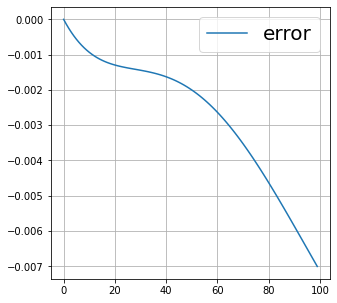

In [10]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(y(x, w, n) - anal(x,lamb), label = 'error')
ax.tick_params(labelsize=10)
ax.legend(fontsize=20)
ax.grid()

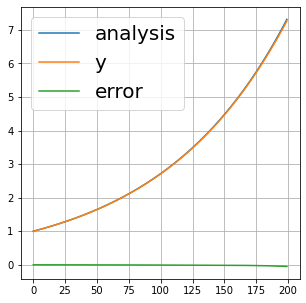

In [11]:
x = tf.Variable([0.01*n for n in range(200)], dtype = tf.float32)
fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(anal(x,lamb), label = 'analysis')
ax.plot(y(x, w, n), label = 'y')
ax.plot(y(x, w, n) - anal(x,lamb), label = 'error')
ax.tick_params(labelsize=10)
ax.legend(fontsize=20)
ax.grid()

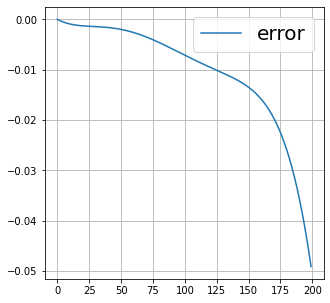

In [12]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(y(x, w, n) - anal(x,lamb), label = 'error')
ax.tick_params(labelsize=10)
ax.legend(fontsize=20)
ax.grid()

In [13]:
# 2022.07.20
# 에러 그래프 부분 보강
# epoch 늘려서 학습 결과 찾기
# w 값 
# w1 = lambda와 비슷하게 -2
# w2 = 2
# w3 = -1
# w4 = 0.5
# layer 구조 확인

# 2022.08.03
# 모델 부분 input -> layer -> layer -> output
# layer 추가 할 수 있게 만들어 놓기

# 2022.08.23
# x 범위 증가 대신 개수 증가로 0 ~ 1 사이
# 코드 공유
# Error 파트 layer 추가
# Solution + Error
##  추가 학습 필요 내용 ## 
# Error에 따른 weight 업데이트 과정 수식 확인
# 비지도 학습 진행과정


In [14]:
print(Epoch)

630


In [15]:
print(loss)

tf.Tensor([0.], shape=(1,), dtype=float32)
